# #1 NEURAL NETWORKS: Single Layer Perceptron

## Single Layer Perceptrons are only capable of learning patterns that are linearly separable. The Learning makes sure to find weights in order to minimize the loss (error) of the output.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### 1. Creating a Dataset

In [2]:
#initiating random number
np.random.seed(101)

In [3]:
#creating a dataset
x1_mean, x1_std = 0, 0.1
x2_mean, x2_std = 0.5, 0.1

In [7]:
df1 = pd.DataFrame({'x1': np.random.normal(x1_mean, x1_std, 500),
'x2': np.random.normal(x1_mean, x1_std, 500),
'type': 0})
df1.head()

,x1,x2,type
0,-0.205330,0.029272,0
1,0.145056,-0.099952,0
2,0.170154,-0.027272,0
3,-0.058251,-0.088645,0
4,0.094387,0.022857,0


In [8]:
df2 = pd.DataFrame({'x1': np.random.normal(x2_mean, x2_std, 500),
'x2': np.random.normal(x2_mean, x2_std, 500),
'type': 1})
df2.head()

,x1,x2,type
0,0.369399,0.615736,1
1,0.484281,0.533456,1
2,0.556782,0.693244,1
3,0.524968,0.521919,1
4,0.419082,0.421399,1


In [9]:
data = pd.concat([df1,df2])
data

,x1,x2,type
0,-0.205330,0.029272,0
1,0.145056,-0.099952,0
2,0.170154,-0.027272,0
3,-0.058251,-0.088645,0
4,0.094387,0.022857,0
...,...,...,...
495,0.489865,0.590310,1
496,0.425012,0.493392,1
497,0.536733,0.547657,1
498,0.377673,0.473863,1


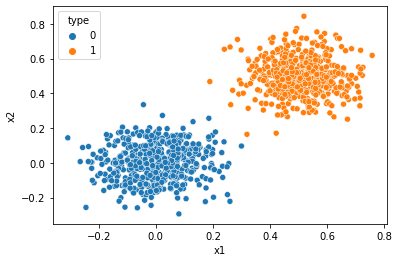

In [205]:
#visualize the data
plot = sns.scatterplot(x='x1', y='x2', hue='type', data=data)

### 2. Implement Class "Perceptron"

In [189]:
class Perceptron:
    """
    b = bias (always equals 1)
    w1, w2 = weight for each input
    """

    def __init__(self, b=1, w1=0.1, w2=0.1):
    #weights
        self.b = b
        self.w1 = w1
        self.w2 = w2
    
    #function of the perceptron: calculating z (multiply weights to x and sum up, add bias)
    def weighted_sum_inputs(self, x1, x2):
        return sum([1 * self.b, x1 * self.w1, x2* self.w2])
    
    #output: calculating y based on z
    def predict(self, x1, x2):
        z = self.weighted_sum_inputs(x1, x2)
        return self.step_function(z)
    
    #activation: step function
    def step_function(self, z):
        if z>=0:
            return 1
        else:
            return 0

    #fit-function: update weights
    #epoch = single step within training which ends when all training samples are used to update weights
    #step = "learning rate" - controls update-ratio (perceptron convergence theorem states that a perceptron will converge if the classes are linearly separable regardless of the learning rate)
    def fit(self, X, y, epochs=1, step=0.1, verbose=True):
        errors = []
        
        for epoch in range(epochs):
            error = 0
        
        #for i (beginning in the first row),...
        for i in range(0, len(X.index)):
            #...get x1,x2 and target,...
            x1, x2, target = X.values[i][0], X.values[i][1], y.values[i]

            #the update is proportional to the step size and the error
            #...and calculate update (update = target - prediction)
            update = step * (target - self.predict(x1,x2))

            #update the weights
            self.w1 += update * x1
            self.w2 += update * x2
            self.b += update
            error += int(update != 0.0)
        
        errors.append(error)

        if verbose:
            print('Epochs: {} - Error: {} - Errors from all epochs: {}'.format(epoch, error, errors))
    
    #predict boundary: visualize the linear decision boundary
    def predict_boundary(self, x):
        return - (self.w1 * x + self.b) / self.w2

### 3. Train-Test-Split

In [190]:
#Train-Test-Split
splitting = np.random.rand(len(data)) < 0.8
X_train, y_train = data[['x1', 'x2']][splitting], data.type[splitting]
X_test, y_test = data[['x1', 'x2']][~splitting], data.type[~splitting]

### 4. Create a Perceptron, Fit it and make predictions

In [191]:
#Initiating a Perceptron
my_perceptron = Perceptron()

In [228]:
#Fitting a Perceptron
#for a good result keep the epochs and step as the default
#to manipulate the performance keep epochs=1 and reduce step to 0.0001 for instance (learning will be slower and epochs not high enough to finish with a good result)
my_perceptron.fit(X_train, y_train, epochs=1, step=0.01)

Epochs: 0 - Error: 0 - Errors from all epochs: [0]


In [229]:
#make predictions
y_pred = X_test.apply(lambda x: my_perceptron.predict(x.x1, x.x2), axis=1)

### 5. Evaluate the Pereceptron

In [230]:
#check the algorithm-performance
from sklearn.metrics import confusion_matrix, classification_report

conf = confusion_matrix(y_test, y_pred, labels=[0,1])
print(pd.DataFrame(conf, index=['True 0', 'True 1'],
columns= ['Predicted 0', 'Predicted 1']))
print('\n')
print(classification_report(y_test, y_pred))

        Predicted 0  Predicted 1
True 0           94            1
True 1            0          112


              precision    recall  f1-score   support

           0       1.00      0.99      0.99        95
           1       0.99      1.00      1.00       112

    accuracy                           1.00       207
   macro avg       1.00      0.99      1.00       207
weighted avg       1.00      1.00      1.00       207



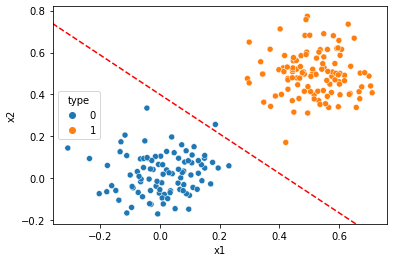

In [231]:
#add decision boundary in scatterplot 'axes'

#plot the decision boundary in a plot that shows the test-data
axes = sns.scatterplot(x='x1', y='x2',hue='type', data=data[~splitting])

axes.autoscale(False)
x_val = np.array(plot.get_xlim())
y_val = my_perceptron.predict_boundary(x_val)
axes.plot(x_val, y_val, '--', c='red')